# **Telco Customer Churn Data Analysis**

this analysis is aimed at analyzing the trend of customer churn in a telco company, the Telco Customer datasets is a datasets i go from Kaggle.

in this Notebook, i will carefully perform end to end data analysis on the data and in a subsequent notebook i will build a customer churn prediction model to help Telco predict early enough if a customer will churn or not

### **About Dataset**

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


now we will import necessary liberary for our analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **laoding the data**

In [ ]:
telco_url = r'/content/drive/MyDrive/Telco-Customer-Churn_kaggle.csv'
telco_df = pd.read_csv(telco_url)
print('the shape is:', telco_df.shape)
telco_df.head()

the shape is: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we can see that the datasets contain 7043 rows and 21 columns

In [ ]:
telco_df.columns.T

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **Data Cleaning**

we will perform some data cleaning on the telco datasets and deal with any missing values and other inconsistencies to ensure data integrity

In [ ]:
# let check for missing values
telco_df.isnull().sum().sum()

0

there no missing values

In [ ]:
# checking for duplicates
duplicates = telco_df.duplicated().any().any()
print(duplicates)

False


there are no duplicates values

## **Exploratory Data Analysis**

we will perform some EDA on the data to understand the data more

### **Descriptive Statistics:**

by calculating descriptive statistics for the 'Churn' column to understand the overall churn rate. This will give us a baseline understanding of how many customers have churned.



In [ ]:
# we will use the describe method to look into the statistic distribution of the columns
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# count the occurrences of each unique value in the 'Churn' column
churn_counts = telco_df['Churn'].value_counts()

# Calculate the churn rate
total_customers = telco_df['Churn'].count()
churn_rate = churn_counts['Yes'] / total_customers

# Print out the descriptive statistics
print("Descriptive Statistics for Churn:")
print(churn_counts)
print(f"Churn Rate: {churn_rate:.2%}")

Descriptive Statistics for Churn:
No     5174
Yes    1869
Name: Churn, dtype: int64
Churn Rate: 26.54%


from the descriptive statistics we just performed, we can say that out of the 7043 customers about 5174 customers are still loyal to the service while about 1869 customers have churned. this is about 26.54% of the whole customers

## **Data Visualization**

In [ ]:
def stacked_bar_plot(data, group, target):
    """
    This function returns a stacked bar plot.
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    # This will create a pivot table to be plotted
    temp_df = (data.groupby([group, target]).size() / data.groupby(group)[target].count()).reset_index().pivot(index=group, columns=target, values=0)
    # We plot the stacked bar
    temp_df.plot(kind='bar', stacked=False, ax=ax, color=["blue", "darkred", "green"], legend=True)
    # Set labels and axis
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn percentage')

now will proceed to plotting the bar plot

we will Visualize the distribution of churned vs. non-churned customers across different categorical variables such as gender, senior citizen status, internet service type, contract type, payment method, etc.


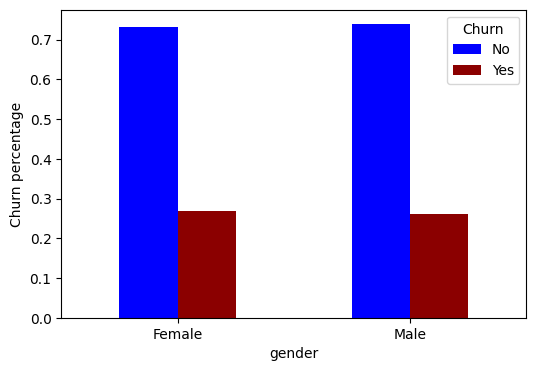

In [ ]:
stacked_bar_plot(telco_df, "gender", "Churn")

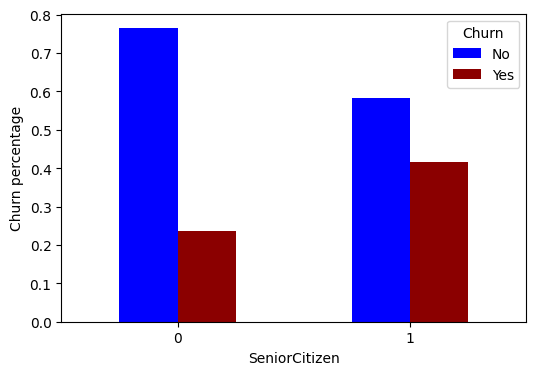

In [ ]:
stacked_bar_plot(telco_df, "SeniorCitizen", "Churn")


senoir citizens tend to churn twice as

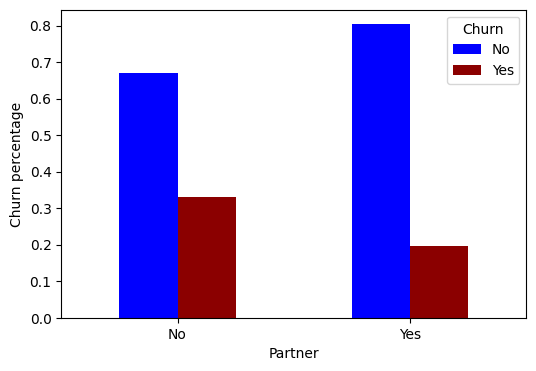

In [ ]:
stacked_bar_plot(telco_df, "Partner", "Churn")


customers without partners tend to show higher tendency to churn than customers without partners

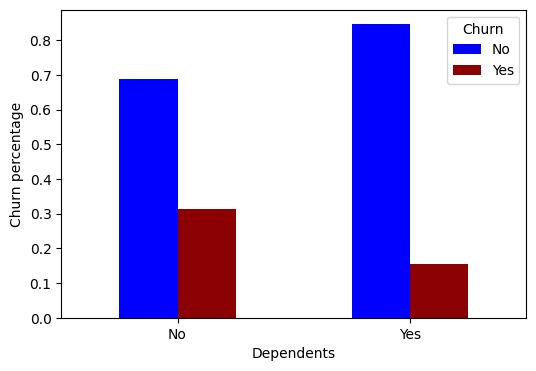

In [ ]:
stacked_bar_plot(telco_df, "Dependents", "Churn")


customer that falls under the dependent category seems to stay loyal than regular customers

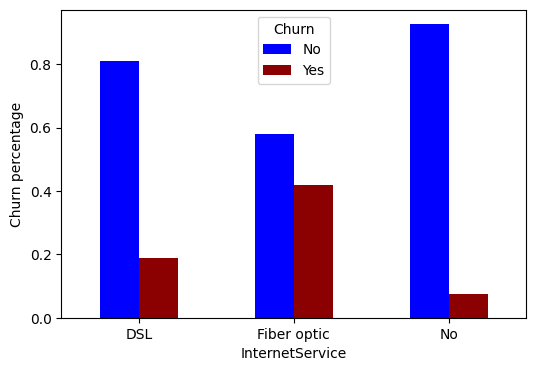

In [ ]:
stacked_bar_plot(telco_df, "InternetService", "Churn")


from the plot above, customers who subscribe to fiber optics possess the hihest possibilities to churn

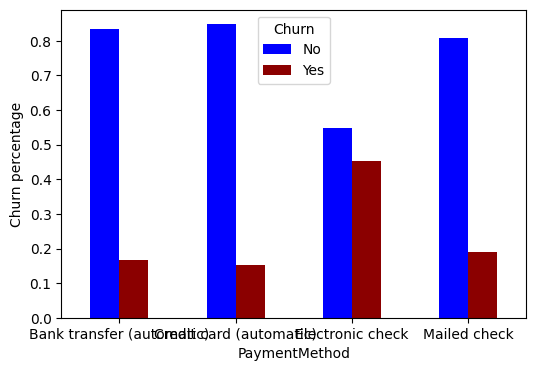

In [ ]:
stacked_bar_plot(telco_df, "PaymentMethod", "Churn")

with regards to payments methods customers who subscribe to electronic checks seems to have very high churn possibilities

### **Churn Rate by Demographic Variables:**

Calculate churn rates for different demographic segments such as gender, senior citizen status, partner status, etc. This will help us identify if certain demographic groups are more likely to churn than others.


In [ ]:
churn_rate_by_gender = telco_df.groupby('gender')['Churn'].value_counts(normalize=True)

print('churn rate by gender is as shown below')
churn_rate_by_gender

churn rate by gender is as shown below


gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: Churn, dtype: float64

the churn rate by gender seems to be approximately equal with femals having a churn rate of about 27% and Male having a churn rate of about 26%. based on gender the customer retention rate is about 73%

In [ ]:
# Churn rate by senior citizen status
churn_rate_by_senior_citizen = telco_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)
print("\nChurn Rate by Senior Citizen Status:")
print(churn_rate_by_senior_citizen)


Churn Rate by Senior Citizen Status:
SeniorCitizen  Churn
0              No       0.763938
               Yes      0.236062
1              No       0.583187
               Yes      0.416813
Name: Churn, dtype: float64


senoir citizens seems to have close to two times the tendency to churn than regurlar citizen, senoir citizen tend to churn at the rate of 41% and regurlar citizens seem to churn at the rate of 24%

In [ ]:
# Churn rate by partner status
churn_rate_by_partner = telco_df.groupby('Partner')['Churn'].value_counts(normalize=True)
print("\nChurn Rate by Partner Status:")
print(churn_rate_by_partner)


Churn Rate by Partner Status:
Partner  Churn
No       No       0.670420
         Yes      0.329580
Yes      No       0.803351
         Yes      0.196649
Name: Churn, dtype: float64


clients without partners tends to have higher tendency to churn (33%) than clients with partners (19%)

### **Churn Rate by Service Usage:**

Analyzing churn rates based on the services customers are using (e.g., internet service type, phone service, streaming services, etc.). will help us to determine if customers with specific service configurations are more likely to churn.

In [ ]:
internet_churn_rate = telco_df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()['Yes']
print("Churn Rate by Internet Service Type:")
print(internet_churn_rate)


Churn Rate by Internet Service Type:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Yes, dtype: float64


In [ ]:
internet_churn_rate = telco_df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()['Yes']
print("Churn Rate by Phone Service Type:")
print(internet_churn_rate)


Churn Rate by Phone Service Type:
PhoneService
No     0.249267
Yes    0.267096
Name: Yes, dtype: float64


In [ ]:
internet_churn_rate = telco_df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack()['Yes']
print("Churn Rate by StreamingTV Service Type:")
print(internet_churn_rate)


Churn Rate by StreamingTV Service Type:
StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Yes, dtype: float64


## **Investigating the Tenure Column**

In [ ]:
# let describe the tenure column
telco_df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
# let counts the values on the tenure
telco_df['tenure'].value_counts().head(15)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
Name: tenure, dtype: int64

now let us visualize the tenure to understand the distribution

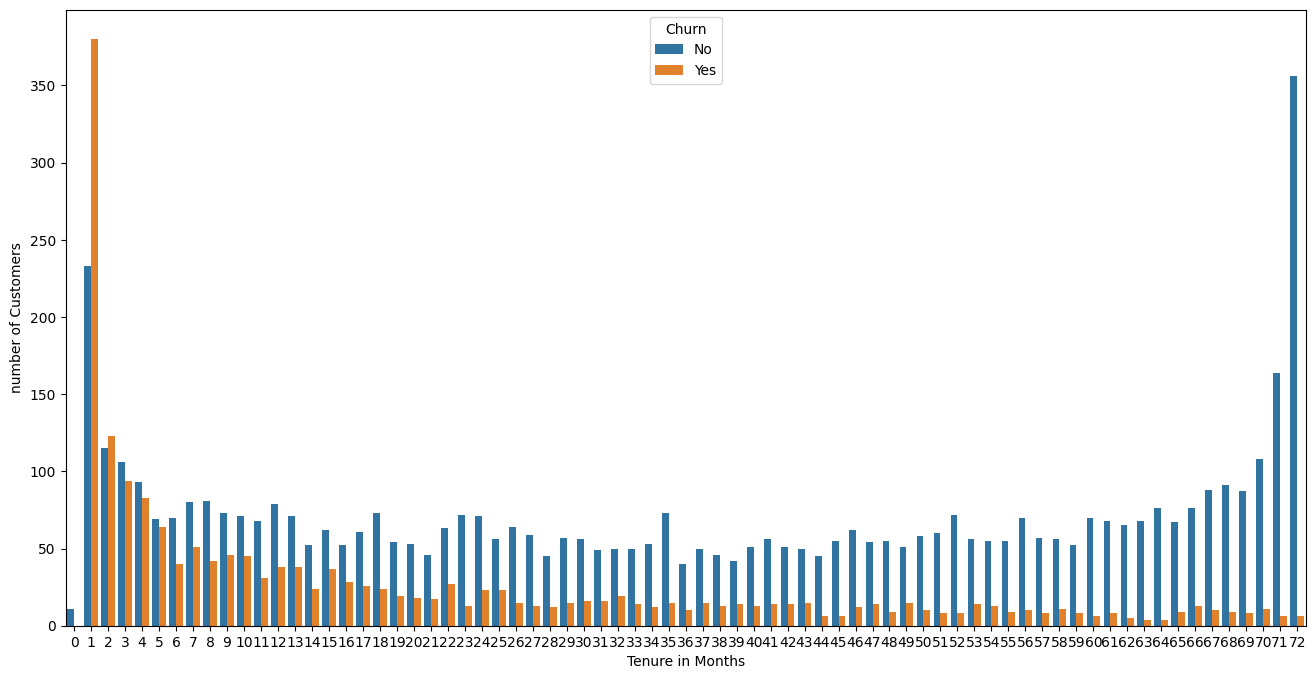

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x="tenure", hue="Churn", data=telco_df)
plt.xlabel('Tenure in Months')
plt.ylabel('number of Customers')
plt.show()

from the plot above, we can deduce that as the tenure increases the customer loyalty/retention also increase. thus cuztomers whose tenure are with the first two months tends to leave than they are are retained while custsomers with longer tenures are more likely to be retained.

In [ ]:
# we will create a function to group the tenures

def tenure(t):
    if t<=6:
        return 1
    elif t>6 and t<=12:
        return 2
    elif t>12 and t<=18:
        return 3
    elif t>18 and t<=24:
        return 4
    elif t>24 and t<=30:
        return 5
    elif t>30 and t<=36:
        return 6
    elif t>36 and t<=42:
        return 7
    elif t>42 and t<=48:
        return 8
    elif t>48 and t<=54:
        return 9
    elif t>54 and t<=60:
        return 10
    elif t>60 and t<=66:
        return 11
    elif t>66 and t<=72:
        return 12

    else:
        return 13

telco_df["tenure_group"]= telco_df["tenure"].apply(lambda x: tenure(x))


In [ ]:
# new lets desplay the count of each group
telco_df["tenure_group"].value_counts()


1     1481
12     944
2      705
3      548
4      476
11     463
5      431
9      420
10     412
6      401
8      383
7      379
Name: tenure_group, dtype: int64

now lets visualize the tenure_group using a barplots

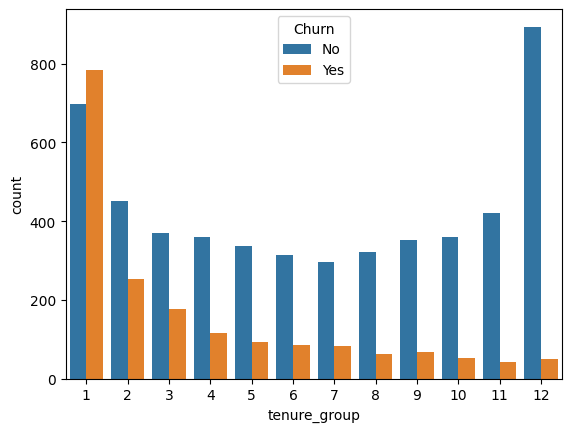

In [ ]:
sns.countplot(x="tenure_group", hue='Churn', data= telco_df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure increase.

Member who fall under the category of 0-6 months tenure are more likely to churn.

## **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**

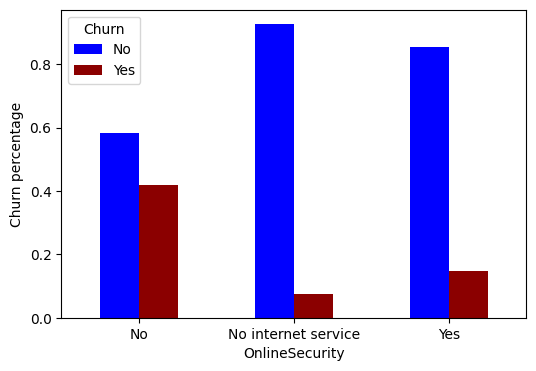

In [ ]:
stacked_bar_plot(telco_df, "OnlineSecurity", "Churn")


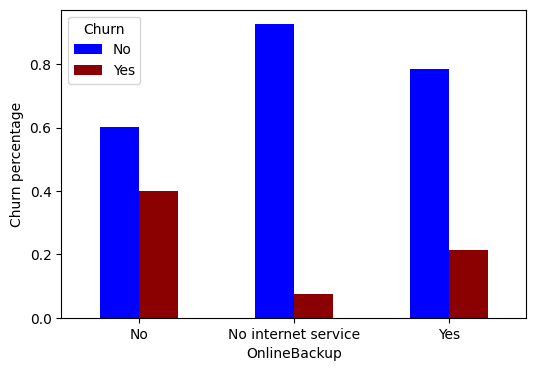

In [ ]:
stacked_bar_plot(telco_df, "OnlineBackup", "Churn")


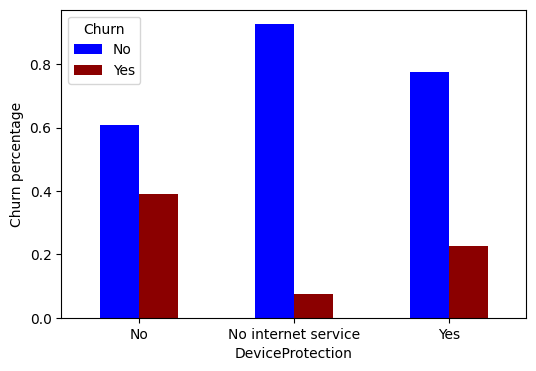

In [ ]:
stacked_bar_plot(telco_df, "DeviceProtection", "Churn")


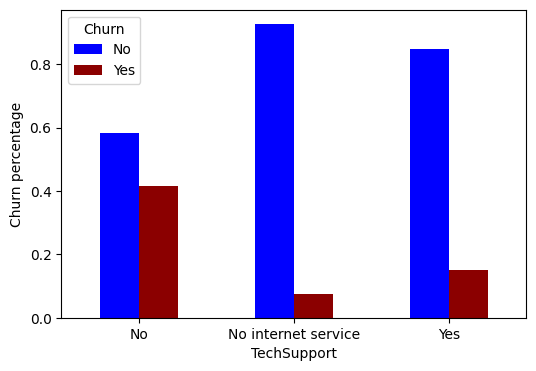

In [ ]:
stacked_bar_plot(telco_df, "TechSupport", "Churn")


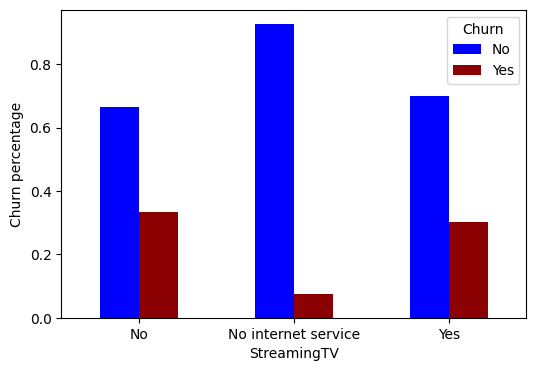

In [ ]:
stacked_bar_plot(telco_df, "StreamingTV", "Churn")


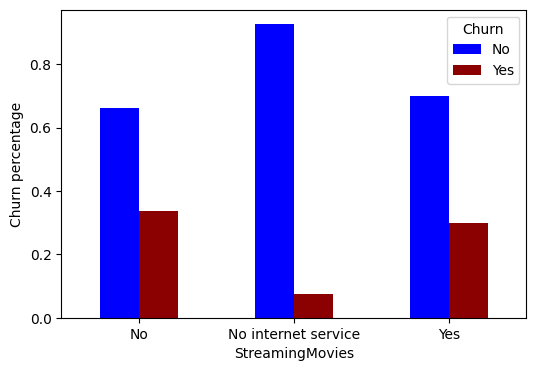

In [ ]:
stacked_bar_plot(telco_df, "StreamingMovies", "Churn")


In all above categories we see an almost consistent results for all. we see that If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.



## **Churn Rate by Tenure and Contract Type:**
we create a visual to analyze churn rates based on customer tenure (length of time with the company) and contract type (month-to-month vs. long-term contracts). Determine if there's a correlation between contract length and churn rate.

<ipython-input-33-3d1a3ba61121>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-33-3d1a3ba61121>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.OnlineSecurity == "Ye

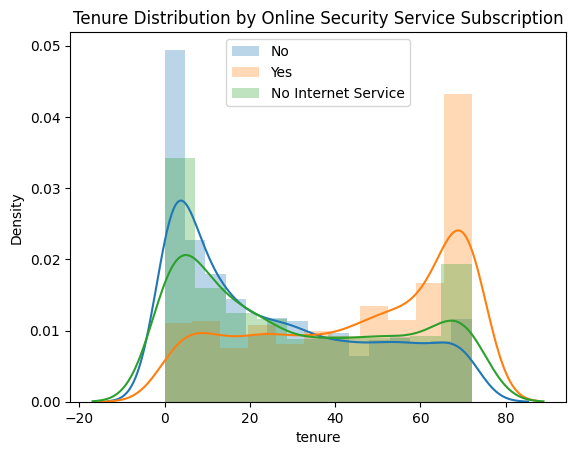

In [ ]:
sns.distplot(telco_df.tenure[telco_df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco_df.tenure[telco_df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco_df.tenure[telco_df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()


<ipython-input-34-a17571561f42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-34-a17571561f42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.StreamingTV == "Yes"], h

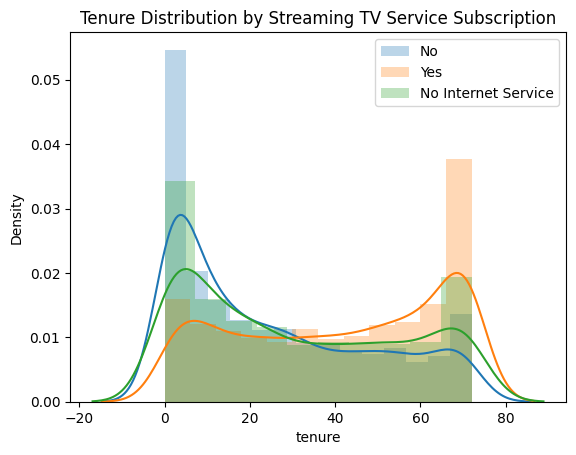

In [ ]:
sns.distplot(telco_df.tenure[telco_df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco_df.tenure[telco_df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco_df.tenure[telco_df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()


<ipython-input-35-79f8f5b24f47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-35-79f8f5b24f47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_df.tenure[telco_df.StreamingMovies == "

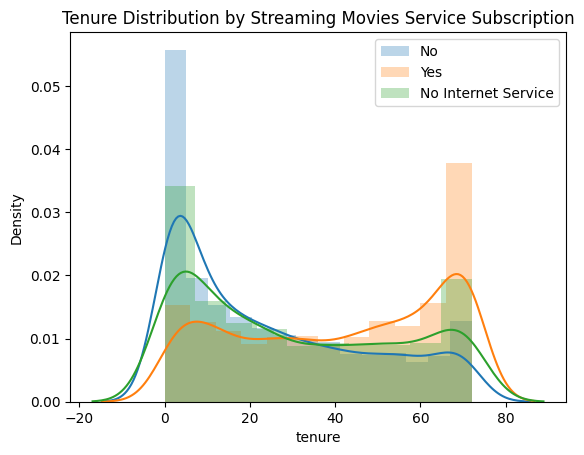

In [ ]:
sns.distplot(telco_df.tenure[telco_df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(telco_df.tenure[telco_df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(telco_df.tenure[telco_df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

from the three visuals above, when the customers are new they do not opt for various services and their churning rate is very high.



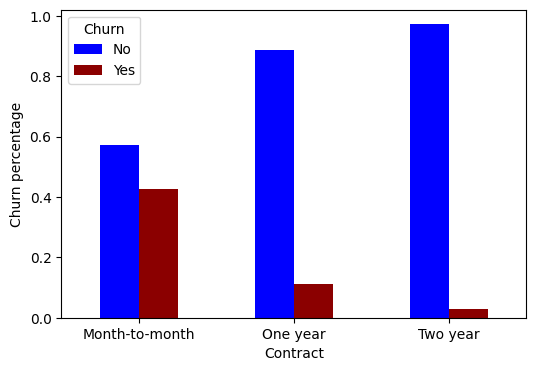

In [ ]:
stacked_bar_plot(telco_df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a need for us to check the  posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

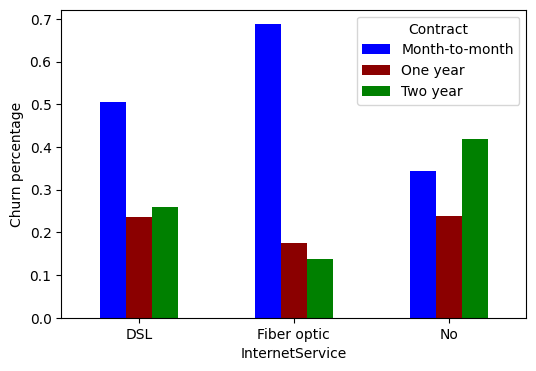

In [ ]:
stacked_bar_plot(telco_df, "InternetService", "Contract")

from the plot, many customers of who subcribe for month-to-month Contract choose Fiber optic as the prefered Internet service and this might be the reason for higher churn rate for fiber optic Internet service type

## **Total Charges**


In [ ]:
# let us describe the targetcharge column
telco_df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

seems there are missing values in that column

In [ ]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(" ", np.nan)
telco_df['TotalCharges'].isnull().sum()

11

In [ ]:
# let display the rows where targetcharge is empty
telco_df[telco_df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


from the displayed table we can see that those column where nothing is is imputed in the targetcharge column corresponds to the columns with zero tenure.

In [ ]:
telco_df['TotalCharges'] = telco_df["TotalCharges"].astype(float)

Churn = telco_df[telco_df.Churn=="Yes"]
Not_Churn = telco_df[telco_df.Churn=="No"]


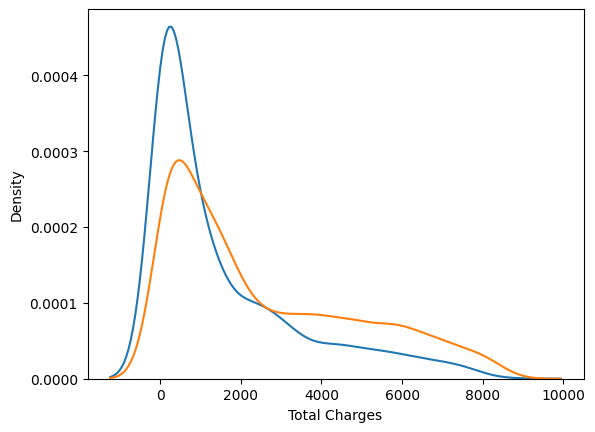

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");


The density of total charges for churning customers are high around 0. As many customers cancel the subsription between 1-2 months.

## **Monthly Charges**

In [ ]:
telco_df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [ ]:
telco_df.MonthlyCharges.isna().sum()

0

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

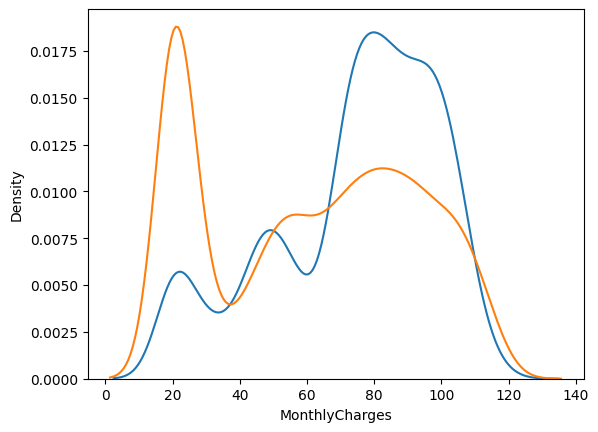

In [ ]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")


from the chart above customers with high monthly feess payments tend to churn more